In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from snvmodels.snv import SNv
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = SNv()

In [3]:
## Supernova neutrino flux
Ev = np.logspace(1,6,100) # Supernova neutrino energy, units of keV
flux_electron_nu = Model.Flux_neutrino( Ev, 'e')
flux_electron_antinu = Model.Flux_neutrino( Ev, 'ea')
flux_x = Model.Flux_neutrino( Ev, 'x')
flux_total = flux_electron_nu + flux_electron_antinu + flux_x

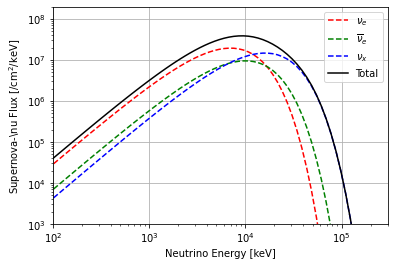

In [4]:
## Supernova neutrino flux
plt.plot(Ev, flux_electron_nu, label=r'$\nu_{e}$', color = 'r', linestyle='--')
plt.plot(Ev, flux_electron_antinu, label=r'$\overline{\nu}_e$', color = 'g', linestyle ='--')
plt.plot(Ev, flux_x, label=r'$\nu_x$', color = 'b', linestyle='--')
plt.plot(Ev, flux_total, label=r'Total', color = 'k', linestyle='-')
#plt.plot(E,[Det.dRdE(DMRate,e) for e in E])
#plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend()
plt.xlabel(r"Neutrino Energy [keV]")
plt.ylabel(r"Supernova-\nu Flux [/cm$^2$/keV]")
plt.xlim(1e2,3e5)
plt.ylim(1e3, 2e8)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Text(0, 0.5, 'Counts [/kg/keV]')

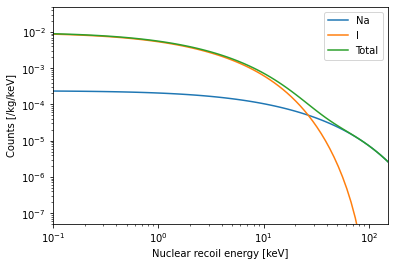

In [5]:
ER = np.logspace(-1,3,100) # Nuclear recoil energy, units of keV
T=Det.Nuclei()
plt.plot(ER,[Model.dRdER(T[0],Ev,ERi) for ERi in ER],label='Na')
plt.plot(ER,[Model.dRdER(T[1],Ev,ERi) for ERi in ER],label='I')
plt.plot(ER,[Model.dRdER(T[0],Ev,ERi)+Model.dRdER(T[1],Ev,ERi) for ERi in ER],label='Total')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [/kg/keV]")

/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))
/Users/guangyongfu/Software/sensitivity/sgm/target.py:150: RuntimeWarning: invalid value encountered in true_divide
  return 3*np.exp(-(0.9*q)**2)*(np.sin(q*rn)-q*rn*np.cos(q*rn))/(np.power(q*rn,3))


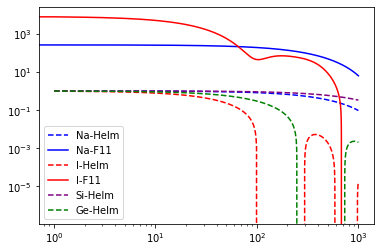

In [6]:
from targets.i import I
from targets.na import Na
from targets.si import Si
from targets.ge import Ge
ER = np.linspace(0,1000,1000)
plt.plot(ER, Na().Helm(ER*1e3),label='Na-Helm',color = 'b', linestyle='--')
plt.plot(ER, Na().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='Na-F11',color = 'b', linestyle='-')
plt.plot(ER, I().Helm(ER*1e3),label='I-Helm',color = 'r', linestyle='--')
plt.plot(ER, I().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='I-F11',color = 'r', linestyle='-')
plt.plot(ER, Si().Helm(ER*1e3),label='Si-Helm',color = 'purple', linestyle='--')
plt.plot(ER, Ge().Helm(ER*1e3),label='Ge-Helm',color = 'green', linestyle='--')
#plt.plot(ER, Si().F11(ER*1e3,1/np.sqrt(2),1/np.sqrt(2)),label='Si-F11',color = 'purple', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.legend()

/Users/guangyongfu/Software/sensitivity/sgm/detector.py:107: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(lambda E2: self.dRdE_True(Model,E2,NR)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised


(5e-08, 0.05)

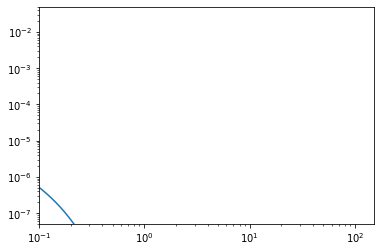

In [7]:
## With DAMA detector response, need to be fixed
ER = np.logspace(-1,3,100) # Nuclear recoil energy, units of keV
def DMRate(T,ER):
    ## DM rate defined with SHM
    return Model.dRdER(T,Ev,ER)
## Supernova neutrino flux
#ER = np.logspace(-2,2,100) # observed energy, units of keV_ee
plt.plot(ER,[Det.dRdE(DMRate,ERi) for ERi in ER])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)